# 2018-10-10 Expériences de développement Retine+LGN
# Refs : Troyer 98 pour le modèle, Marr 82 pour les spatiaux, Cai 97 pour les formes des temporels
C'est la suite logique et comme je vois pas trop comment avancer la partie corticale je vais passer mon attention la dessus.

Un papier sur lequel je retombe souvent est celui de Troyer 98 ([Contrast invariant orientation tuning](https://www.ncbi.nlm.nih.gov/pubmed/9671678)). Entre le papier, celui de Kremkow et celui des Hongrois il y a de quoi faire.

Un site avec des bouts de code :http://www.neuralensemble.blogspot.com/2014/06/gsoc-open-source-brain-retinal-filter-i.html 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_middle(a_list):
    middle = len(a_list)/2
    return a_list[int(middle)]

# Retine : Center/Surround RF
Adapté de http://www.neuralensemble.blogspot.com/2014/06/gsoc-open-source-brain-retinal-filter-i.html

In [2]:
#Un premier filtre, spatial avec center-surround (voir et citer MARR ?)
def spatial_filter(wx = 5., wy = 5., xres = .1, yres = .1, sigma_center = 1., sigma_surround= 1.2,
                  x_trans = 0, y_trans = 0, theta = 0, end_multiplier = -.01) :
    '''wx, wy : x/y width
    xres, yres : x/y resolution
    sigma_center : U.A related to the center of the circle
    sigma_surround : U.A related to the surround of of the circle
    x_trans, y_trans : 0, 0 #translation of the filter
    theta = 0 : rotates the whole filter'''
    
    theta = theta*np.pi/180 #je vais finir par appeller ça la conversion perrinet 

    x = np.arange((-wx+x_trans)/2, (wx+x_trans)/2, xres)
    y = np.arange((-wy+y_trans)/2, (wy+y_trans)/2, yres)
    X,Y = np.meshgrid(x,y)

    X_ = np.cos(theta) * X + np.sin(theta) * Y
    Y = -np.sin(theta) * X + np.cos(theta) * Y
    X = X_

    radius = np.sqrt((X-x_trans)**2 + (Y-y_trans)**2)
    center = (17.0 / sigma_center**2) * np.exp(-(radius / sigma_center)**2)
    surround = (16.0 / sigma_surround**2) * np.exp(-(radius / sigma_surround)**2)

    Z = surround - center
    Z *= end_multiplier
    return X,Y,Z

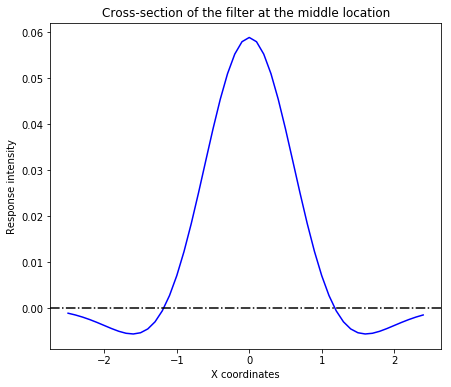

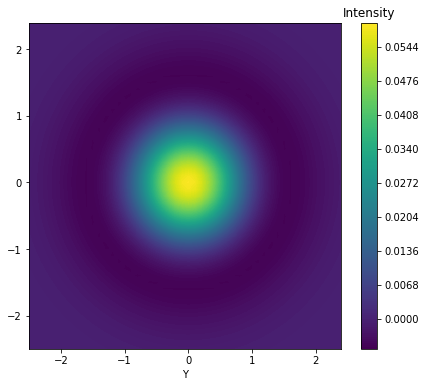

In [3]:
X,Y,Z = spatial_filter()
plt.figure(figsize = (7,6))
plt.plot(find_middle(X), find_middle(Z), color = 'b')
plt.axhline(0, color = 'k', linestyle = '-.')

plt.xlabel('X coordinates')
plt.ylabel('Response intensity')
plt.title('Cross-section of the filter at the middle location')
plt.savefig('./figs/2018_10_11_Cross_section_ON_field.pdf', format = 'pdf', dpi = 200)
plt.show()


plt.figure(figsize = (7,6))
plt.contourf(X,Y,Z, 200, cmap = plt.cm.viridis) #faire un dégradé de couleur sur le plt
cb = plt.colorbar()
cb.ax.set_title('Intensity')

plt.xlabel('X')
plt.xlabel('Y')
plt.savefig('./figs/2018_10_11_2D_ON_field.pdf', format = 'pdf', dpi = 200)


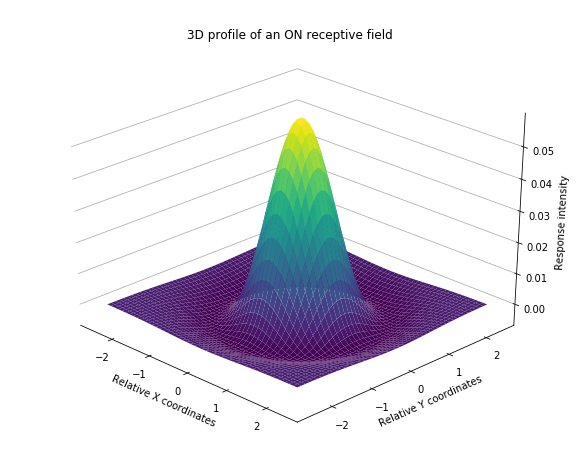

In [4]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')

ax.plot_surface(X,Y,Z, cmap = plt.cm.viridis)

ax.set_zlabel('Response intensity')
ax.set_xlabel('Relative X coordinates') 
ax.set_ylabel('Relative Y coordinates')

ax.xaxis._axinfo["grid"]["color"] = (1,1,1,0)
ax.yaxis._axinfo["grid"]["color"] = (1,1,1,0)
#ax.zaxis._axinfo["grid"]["color"] = (1,1,1,0)

ax.xaxis.set_pane_color((1.0,1.0,1.0,0.0))
ax.yaxis.set_pane_color((1.0,1.0,1.0,0.0))
ax.zaxis.set_pane_color((1.0,1.0,1.0,0.0))

ax.set_title('3D profile of an ON receptive field')

ax.view_init(azim = -45, elev=30)
plt.savefig('./figs/2018_10_11_3D_ON_fied.pdf', format = 'pdf', dpi = 200)

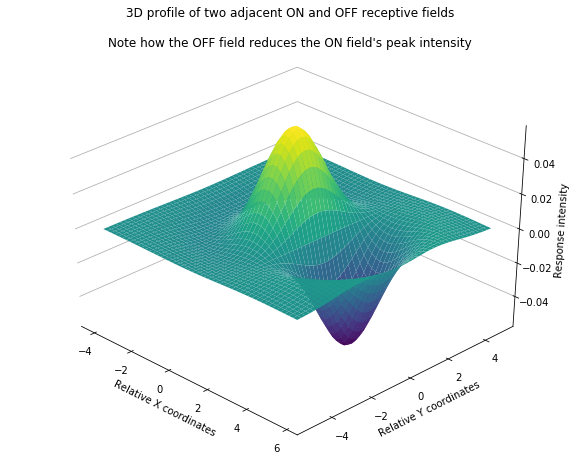

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')

A,B,C = spatial_filter(end_multiplier = .01, wx = 5, wy = 5, xres = .1, yres = .1, 
                       sigma_center = 1., sigma_surround = 1.2,
                        x_trans = 2)
D,E,F =spatial_filter(end_multiplier = -.01, wx = 5, wy = 5, xres = .1, yres = .1, 
                       sigma_center = 1., sigma_surround = 1.2,
                        x_trans = 0)
X = A+D
Y = B+E
Z = C+F
ax.plot_surface(X,Y,Z, cmap = plt.cm.viridis)

ax.set_zlabel('Response intensity')
ax.set_xlabel('Relative X coordinates') 
ax.set_ylabel('Relative Y coordinates')

ax.xaxis._axinfo["grid"]["color"] = (1,1,1,0)
ax.yaxis._axinfo["grid"]["color"] = (1,1,1,0)
#ax.zaxis._axinfo["grid"]["color"] = (1,1,1,0)

ax.xaxis.set_pane_color((1.0,1.0,1.0,0.0))
ax.yaxis.set_pane_color((1.0,1.0,1.0,0.0))
ax.zaxis.set_pane_color((1.0,1.0,1.0,0.0))

ax.set_title('''3D profile of two adjacent ON and OFF receptive fields
             \nNote how the OFF field reduces the ON field's peak intensity''')

ax.view_init(azim = -45, elev = 35)
fig.savefig('./figs/2018_10_11_3D_Two_SpatialFilters.pdf', format = 'pdf', dpi = 200)

# Retine, réponse temporelle
Ca c'est du bonus, mais ça sort du papier de Cai FIGURE 2 donc on va le prendre aussi : 
(https://www.ncbi.nlm.nih.gov/pubmed/9307134)

Dans le papier la normalisation d'amplitude pique de 0 à 1. en 50 ms pour retomber a -.4 en 50 ms et dremonte lentement jusqu'à 0 en 100 ms

In [6]:
# Filtre temporel, c'est le décours de la réponse canonique
# vérifier les params avec Laurent

def temporal_filter(total_time = 200, t_res = 1.,
                   K1 = .92, c1 = 0.2, n1 = 7, t1 = -6,
                   K2 = .2, c2 = .12, n2 = 8, t2 = -6):
    '''
    total time = total response time
    t_res = resolution of the filter
    other params are as f(x) = K * [ (c*(t-1))**2 * e^(-c1(t-t1)) ] / [ (n**2) * e^-n]
    (see wikipedia for formula)
    K is the height, c is the opening
    '''
    t = np.arange(0, total_time*t_res, t_res)
    p1 = K1 * ( (c1 * (t - t1))**n1 * np.exp(-c1 * (t-t1))) / (n1**2)*np.exp(-n1)
    p2 = K2 * ( (c2 * (t - t2))**n2 * np.exp(-c2 * (t-t2))) / (n2**2)*np.exp(-n2)
    return (p1-p2)*90 #oups je me suis planté d'un facteur 90

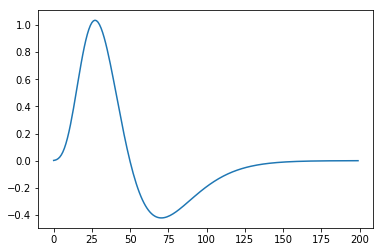

In [7]:
ys = temporal_filter(c1 = .20, c2 = .12, 
                     K1 = .92, K2 = .2)
plt.plot(ys)
plt.show()
fig.savefig('./figs/2018_10_11_Temporal_Filter.pdf', format = 'pdf', dpi = 200)

# Filtre spatiotemporel

In [8]:
def spatiotemporal_filter(spatio_X, spatio_Y, spatio_Z, wx, wy, xres, yres,
                          tempo, tempo_size, filter_res):
    X = spatio_X
    Y = spatio_Y
    Z = spatio_Z
    t = tempo
    
    #initializes a matrix of the same size as the temporal filter
    #with X*Y the same size as the spatial filter
    full_filter = np.zeros((tempo_size, int(wx/xres), int(wy/yres)))
    print(full_filter.shape)
    print('len'+str(len(full_filter)))
    
    for i, ft in enumerate(tempo):
        full_filter[i,...] = ft*Z
        
    return full_filter * filter_res * ((wx/xres) * (wy/yres)) 

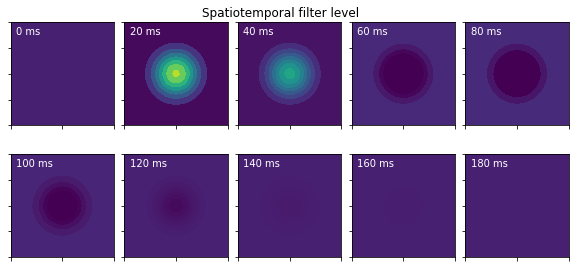

In [9]:
#c'est pas propre mais j'ai eu des tas de pb avec matplotlib alors on va la jouer comme ça
#pas besoin de s'embêter avec les colormaps vu que c'est la meme que celle de la 3D, qui va surement
#finir a coté sur le rapport
import matplotlib.gridspec as gridspec

X,Y,Z = spatial_filter(end_multiplier = -1, wx = 5, wy = 5, xres = .1, yres = .1, 
                       sigma_center = 1., sigma_surround = 1.2)
ys = temporal_filter()

plt.figure(figsize = (10,8))
plt.subplots_adjust(bottom = .55, top = .97, wspace = .1)

for i, t in enumerate(ys[::20]) :
    ax = plt.subplot(2,5,i+1, aspect = 'equal')
    cf = plt.contourf(X,Y, t*Z, vmin = min(find_middle(Z)), vmax = max(find_middle(Z)))
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.text(-1.8,1.5,'%s ms' % (int(i)*20),color = 'white')


plt.suptitle('Spatiotemporal filter level',x = .5,y= .99)
fig.savefig('./figs/2018_10_11_SpatioTemporal_filter.pdf', format = 'pdf', dpi = 200)

# Stimulation time !
A partir de la je trouve qu'ils ont fait un peu n'importe quoi dans les variations de résolution temporelles, donc on va arrêter la pour aujourd'hui et normaliser tout ça demain.

In [10]:
X,Y,Z = spatial_filter(wx = 5., wy = 5., xres = .1, yres = .1)
t = temporal_filter(total_time = 200)

filter_res = 5.
#returns tempo_size spatial filters, modified by the temporal filter
st = spatiotemporal_filter(spatio_X = X, spatio_Y = Y, spatio_Z = Z, 
                           wx = 5., wy = 5., xres = .1, yres = .1,
                          tempo = t, tempo_size = 200,
                          filter_res = filter_res)

res_resp = 1. #resolution of the zombi-LGN-RET answer
res_stim = 10. #resolution of the stimulation


stim_time = 500 #time of stim in ms
stim_points = int(stim_time/res_resp) #nbr of stim points
n_stim = int(stim_time/res_stim) #nbr of stim
stimuli = np.random.randint(-1,2, size = (n_stim, int(5./.1), int(5./.1))) #5. = wx, .1 = xres

(200, 50, 50)
len200


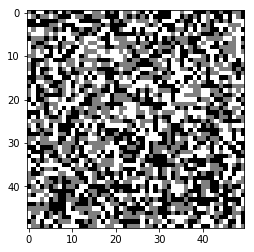

In [11]:
plt.imshow(stimuli[1], cmap = plt.cm.binary)

In [12]:
#the example works on multiple timescales, i'll use one as a finishing touch
input_to_image = res_resp/res_stim
filter_to_input = filter_res/res_resp
input_to_filter = res_resp/filter_res

#arche-indexes
working_indexes = np.arange(n_stim).astype(int)
remove_start = int(200 * filter_to_input)
signal_indexes = np.arange(remove_start, n_stim).astype(int)

#kernel_times
kernel_times = np.arange(200)
kernel_times = kernel_times.astype(int)

#delay indexes
delay_indexes = np.floor(kernel_times * filter_to_input)
delay_indexes = delay_indexes.astype(int)

#image indees
stimuli_indexes = np.zeros(working_indexes.size)
stimuli_indexes = np.floor(working_indexes * input_to_image)
stimuli_indexes = stimuli_indexes.astype(int)

In [13]:
stimuli_indexes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

In [14]:
for index in signal_indexes :
    delay = stimuli_indexes[index-delay_indexes]
    signal[index] = np.sum(st[kernel_times,...]*stimuli[delay,...])
    print(signal)
    
'''tm = np.arange(remove_start*res_resp, stim_time, res_resp)
plt.plot(t, signal[signal_indexes], '-', label = 'Kernel responding to noise')
plt.legend()'''

"tm = np.arange(remove_start*res_resp, stim_time, res_resp)\nplt.plot(t, signal[signal_indexes], '-', label = 'Kernel responding to noise')\nplt.legend()"